In [25]:
## ISLR (Chapter 8), cont'd - Tree Ensemble Methods

In [3]:
%load_ext autoreload
%autoreload 2
import sys

In [4]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tree plotting
import pydot
from IPython.display import Image
import graphviz 
#from sklearn.externals.six import StringIO  
from io import StringIO  

# Model selection
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

%matplotlib inline
plt.style.use('seaborn-white')

### 8.3.3 Bagging and Random Forests

In [11]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

In [12]:
boston_df = pd.read_csv('../data/Boston.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [14]:
# There are 13 features in the dataset
X.shape

(506, 13)

### Bagging: using all features

In [15]:
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

Text(0, 0.5, 'y_test')

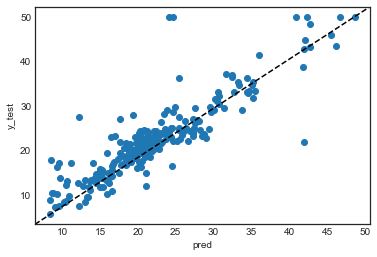

In [16]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [17]:
mean_squared_error(y_test, pred)

16.17512869960475

### Random forests: using 6 features

In [18]:
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [19]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

15.82350045849802

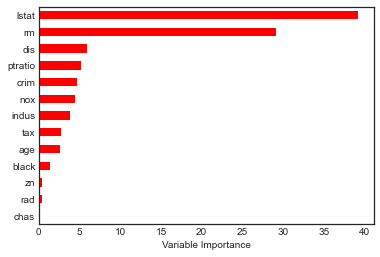

In [20]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### 8.3.4 Boosting

In [21]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

zn          0.013059
chas        0.121257
rad         0.153199
black       0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


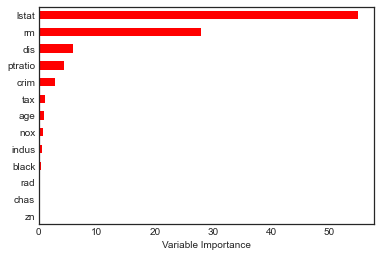

In [23]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [24]:
mean_squared_error(y_test, regr.predict(X_test))

15.592155779633027